In [36]:
### 5.1 Random Forest using sklearn
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=DeprecationWarning)

# Classification metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, log_loss)

# Load the Iris dataset
from sklearn.datasets import load_iris
iris_dataset=load_iris()
print(iris_dataset.DESCR)
print(iris_dataset)
X,y = load_iris(return_X_y= True)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
# STEP1. Separating training and testing datasets
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.4, random_state=777)

In [5]:
# STEP2&3. Optimizing hyperparameters via cross validation
# Instantiate a model object
clf = RandomForestClassifier()

# Set a search range
parameters = {'n_estimators':[100,150,200], 'criterion':['gini','entropy']}

# Find the best hyperparameters using GridSearchCV
gridsearch = GridSearchCV(clf, parameters, scoring = 'accuracy', cv=5)
gridsearch.fit(X_tr,y_tr)

# Show the best hyperparameter
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# The best model is stored in 'best_clf'
best_clf = gridsearch.best_estimator_
best_clf

gridsearch.best_params_ = {'criterion': 'gini', 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# STEP4. Model performance
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

test_acc = 0.9333333333333333


In [7]:
# STEP5. Train final model on full dataset(optional step)
final_model = RandomForestClassifier(**gridsearch.best_params_)
final_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
### 5.2 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# load a dataset
X,y = load_iris(return_X_y=True)

# STEP1. Get training and testing datasets
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.4,random_state=777)

# STEP1-1. Data Normalization
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

# show first 5 instances
print('Before normalization :\n',X_tr[:5])
print('After normalization :\n',X_tr_normalized[:5])

Before normalization :
 [[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [4.6 3.1 1.5 0.2]
 [4.8 3.1 1.6 0.2]
 [4.5 2.3 1.3 0.3]]
After normalization :
 [[0.34375    0.16666667 0.46296296 0.375     ]
 [0.59375    0.33333333 0.72222222 0.58333333]
 [0.0625     0.45833333 0.05555556 0.04166667]
 [0.125      0.45833333 0.07407407 0.04166667]
 [0.03125    0.125      0.01851852 0.08333333]]


In [10]:
# STEP2. Use GridSearchCV to find optimal hyperparameter values
clf = LogisticRegression(max_iter=5000)
parameters = {'penalty':['l2'],'C':[10e-5,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3,10e5]}
gridsearch = GridSearchCV(clf, parameters, scoring = 'accuracy', cv = 5)
gridsearch.fit(X_tr_normalized, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# STEP3. Get model with best hyperparameter
best_clf = gridsearch.best_estimator_

# STEP4. Get best model performance from testing set
y_pred = best_clf.predict(X_ts_normalized)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'C': 100.0, 'penalty': 'l2'}
test_acc = 0.9833333333333333


Text(0.5, 0, '$x_2$')

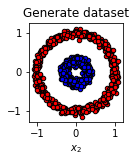

In [11]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate a dataset
X,y = make_circles(n_samples = 1000, factor = .3, noise = .05)

# Show the dataset
plt.figure()
plt.subplot(2,2,1,aspect='equal')
plt.title("Generate dataset")
reds = y ==0
blues = y ==1

plt.scatter(X[reds,0], X[reds,1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues,0],X[blues,1],c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.xlabel("$x_2$")

# 1. Decision boundary
# 2. Regularization

**선긋는 작업**

**- 1차함수 )** linear model : logistic regression

**- n차함수 )** non-linear model


DT는 대표적인 non-linear model 따라서 RF 역시 non-linear
데이터가 칼같이 잘 나뉘면 linear model로도 결과물이 잘 나오지만
그렇지 않을 경우 non-linear가 효과적.

non-linear model은 상대적으로 linaer model보다 복잡하다.
학습하는데에도, test과정에서도 시간이 오래걸릴 수 있다. 즉, expensive하다.
동시에 non-linear을 이해하는 데에도 어렵다. model이 쉽다면 model을 통해 새로운 info를 얻어낼 수 있다. overfitting되기 쉽다. 


In [0]:
### Logistic Regression
# STEP1. Get training and testing dataset
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.4,random_state=777)

# Data normalization
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

# STEP2. Use GridSearchCV to find optimal hyperparameter values


In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X,y = load_iris(return_X_y=True)
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.4, random_state=777)

# Data normalization
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def test_bagged_logreg(K, X_tr, y_tr, X_ts, y_ts):
  base = LogisticRegression(penalty='l2', max_iter=5000)
  # produce emsemble model
  clf = BaggingClassifier(base, n_estimators=K, bootstrap=True, n_jobs=-1)

  parameters = {'base_estimator__C':[10e-5, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
  gridsearch = GridSearchCV(clf, parameters, scoring='accuracy',cv=5)
  gridsearch.fit(X_tr,y_tr)
  best_clf = gridsearch.best_estimator_
  y_pred=best_clf.predict(X_ts)
  test_acc = accuracy_score(y_ts,y_pred)

  return best_clf, y_pred, test_acc

In [17]:
test_bagged_logreg(3, X_tr_normalized, y_tr, X_ts_normalized,y_ts)

(BaggingClassifier(base_estimator=LogisticRegression(C=100.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=5000,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   bootstrap=True, bootstrap_features=False, max_features=1.0,
                   max_samples=1.0, n_estimators=3

In [0]:
### Boosted Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def test_boosted_logreg(K,X_tr,y_tr,X_ts,y_ts):
  base = LogisticRegression(penalty='l2',max_iter=5000)
  clf = AdaBoostClassifier(base, n_estimators=K)
  parameters = {'base_estimator__C':[10e-5, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
  gridsearch = GridSearchCV(clf,parameters,scoring='accuracy',cv=5)
  gridsearch.fit(X_tr_normalized,y_tr)
  best_clf = gridsearch.best_estimator_
  y_pred = best_clf.predict(X_ts)
  test_acc = accuracy_score(y_ts, y_pred)

  return best_clf, y_pred, test_acc

In [19]:
test_boosted_logreg(3,X_tr_normalized,y_tr,X_ts_normalized,y_ts)

(AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=LogisticRegression(C=100.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=5000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=None,
                                                      solver='lbfgs', tol=0.0001,
                                                      verbose=0,
                                                      warm_start=False),
                    learning_rate=1.0, n_estimators=3, random_state=None),
 

In [0]:
### Benchmark
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore',category = FutureWarning)
warnings.simplefilter(action='ignore',category = DeprecationWarning)
warnings.simplefilter(action='ignore',category = ConvergenceWarning)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate a dataset
X,y= make_circles(n_samples=1000, factor=.3, noise=.05)
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size = 0.4, random_state=777)

# Data normalization
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

In [29]:
test_acc_bagging=[]
test_acc_boosting=[]

exp_range = range(1,31)
for n_estimators in exp_range:
  if n_estimators%5==0:
    print(n_estimators,end='')
  else:
    print('.',end='')

  # Bagging
  _,y_pred,t = test_bagged_logreg(n_estimators,X_tr_normalized,y_tr,X_ts_normalized,y_ts)
  test_acc_bagging.append(accuracy_score(y_ts,y_pred))

  # Boosting
  _,y_pred,t = test_boosted_logreg(n_estimators,X_tr_normalized,y_tr,X_ts_normalized,y_ts)
  test_acc_boosting.append(accuracy_score(y_ts,y_pred))


print('\n',test_bagged_logreg)
print(test_boosted_logreg)

....5....10....15....20....25....30<function test_bagged_logreg at 0x7f0410e8dae8>
<function test_boosted_logreg at 0x7f041057fd90>


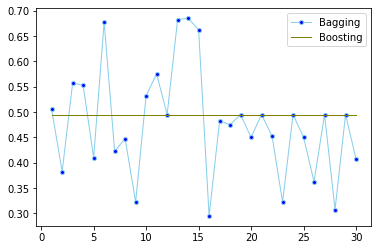

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(exp_range, test_acc_bagging, marker='o', markerfacecolor='blue',markersize=4, color='skyblue',linewidth=1)
plt.plot(exp_range, test_acc_boosting, marker='', color='olive',linewidth=1)
plt.legend(['Bagging','Boosting'])

- max_leaf_nodes

- max_samples{int,float}
  default = None

- min_impurity_decrease{float}
default = 0


- min_impurity_split {float}
default = 1e-7
노드의 impurity가 min_impurity_split을 넘으면, split
아닐 경우, leaf로 남는다.